# Experiment 6

## Strengths and Weaknesses of K-Means Algorithm

### K-means clustering offers the following benefits:

It is a fast algorithm.

It can handle large datasets well.

### However, it comes with the following potential drawbacks:

It requires us to specify the number of clusters before performing the algorithm.

It’s sensitive to outliers.

#### Two alternatives to k-means clustering are k-medoids clustering and hierarchical clustering.

## Code and Ouput

### Import the libraries

In [5]:
install.packages('factoextra')
install.packages('cluster')

also installing the dependencies 'Rcpp', 'matrixStats', 'zip', 'SparseM', 'MatrixModels', 'conquer', 'sp', 'openxlsx', 'minqa', 'nloptr', 'statmod', 'RcppEigen', 'carData', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4', 'crosstalk', 'broom', 'corrplot', 'viridis', 'car', 'DT', 'ellipse', 'flashClust', 'leaps', 'scatterplot3d', 'ggsci', 'cowplot', 'ggsignif', 'polynom', 'rstatix', 'abind', 'dendextend', 'FactoMineR', 'ggpubr', 'ggrepel'



package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Rushank Shah\anaconda3\envs\DMBI_Sem6\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\Rushank Shah\anaconda3\envs\DMBI_Sem6\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"Warning message:
"restored 'Rcpp'"

package 'matrixStats' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'rio' successfully unpacked and MD5 sums checked
package 'lme4' successful

### Load the libraries

In [6]:
library(factoextra)
library(cluster)

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'cluster' was built under R version 3.6.3"

### Now let's start with analysis

In [7]:
data <- USArrests
data <- na.omit(data)

head(data)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [8]:
# scale each variable to have a mean of 0 and sd of 1
data <- scale(data)
head(data)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


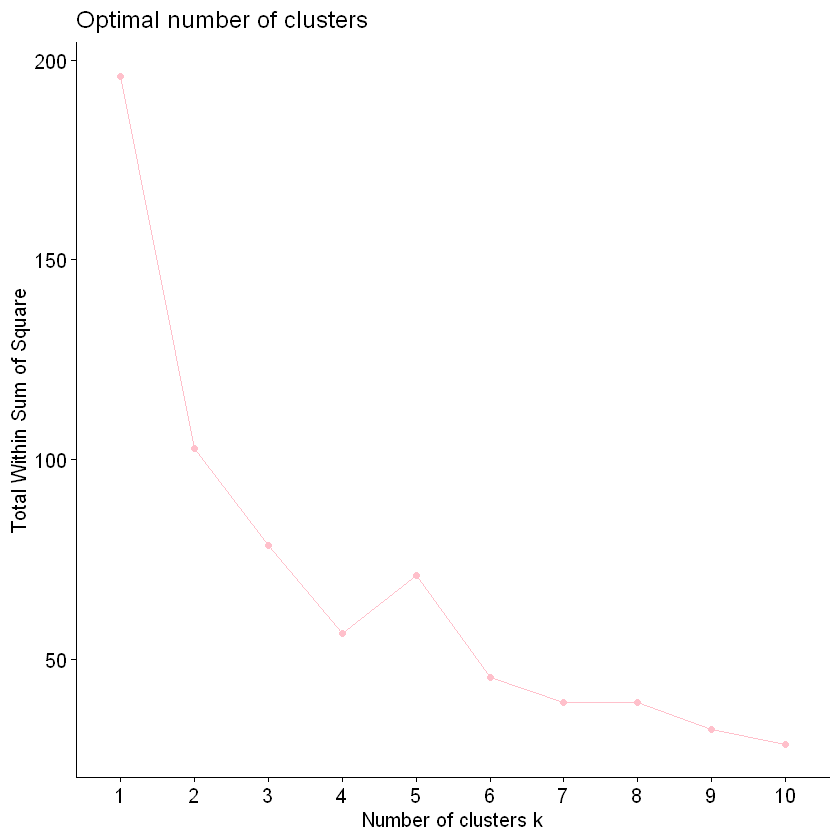

In [9]:
# To find the number of optimal clusters, we can first plot the number of clusters vs. the total within sum of squares graph
fviz_nbclust(data, kmeans, method = "wss", linecolor = "pink")

In [10]:
# According to the above graph, it seems that 4 is the optimal number of clusters
# Typically when we create this type of plot we look for an “elbow” where the sum of squares begins to “bend” or level off. 
# This is typically the optimal number of clusters.

# Now let's calculate k-means

km <- kmeans(data, centers = 4, nstart = 25)
km

K-means clustering with 4 clusters of sizes 13, 13, 8, 16

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.96676331
2  0.6950701  1.0394414  0.7226370  1.27693964
3  1.4118898  0.8743346 -0.8145211  0.01927104
4 -0.4894375 -0.3826001  0.5758298 -0.26165379

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             3              2              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              4              4              2              3 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             4              1              2              4              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             4              1              3              1              2 
 Massachusetts       Michigan      Minnesota    Mississippi    

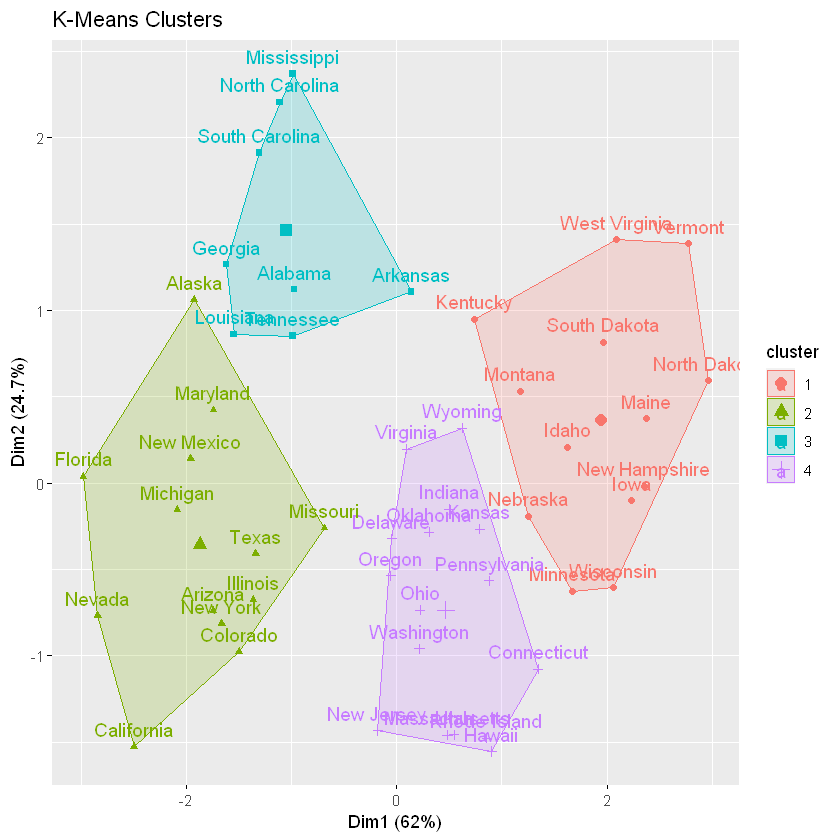

In [11]:
fviz_cluster(km, data = data,main = "K-Means Clusters")

In [12]:
# Add cluster assigment to original data
final_data <- cbind(USArrests, cluster = km$cluster)
head(final_data)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2


In [13]:
# Now we can check for the means in each cluster
aggregate(USArrests, by=list(cluster=km$cluster), mean)

cluster,Murder,Assault,UrbanPop,Rape
1,3.60000,78.53846,52.07692,12.17692
2,10.81538,257.38462,76.00000,33.19231
3,13.93750,243.62500,53.75000,21.41250
4,5.65625,138.87500,73.87500,18.78125


#### We interpret this output is as follows:

The mean number of murders per 100,000 citizens among the states in cluster 1 is 3.6.

The mean number of assaults per 100,000 citizens among the states in cluster 1 is 78.5.

The mean percentage of residents living in an urban area among the states in cluster 1 is 52.1%.

The mean number of rapes per 100,000 citizens among the states in cluster 1 is 12.2.


And so on.